In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head().T

,0,1,2,3,4
tracking_id,WM_33725,WM_698,WM_39146,WM_6757,WM_21521
datetime,2019-08-04 14:33:20,2018-11-05 10:13:20,2019-09-14 14:03:20,2018-12-25 15:33:20,2019-05-04 03:13:20
wind_speed(m/s),94.82,241.833,95.4847,238.819,10.7229
atmospheric_temperature(°C),-99,27.7648,NaN,-99,NaN
shaft_temperature(°C),41.723,-99,41.8555,45.4439,41.9812
blades_angle(°),-0.903423,-99,12.6528,15.1153,1.7157
gearbox_temperature(°C),82.4106,44.1049,42.3221,44.7596,-17.6165
engine_temperature(°C),42.523,46.2589,42.8786,47.2821,43.4699
motor_torque(N-m),2563.12,2372.38,1657.17,2888.13,781.695
generator_temperature(°C),76.6656,78.1298,67.6545,95.39,37.4231


In [4]:
### dependent variable

train['windmill_generated_power(kW/h)'].describe()

count    27993.000000
mean         6.130529
std          2.697520
min          0.962305
25%          4.059505
50%          5.764710
75%          7.947195
max         20.175358
Name: windmill_generated_power(kW/h), dtype: float64

In [5]:
train['windmill_generated_power(kW/h)'].nunique()

27988

In [6]:
train.shape, test.shape

((28200, 22), (12086, 21))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [8]:
train_miss_cols=train.columns[train.isna().sum()>0]
test_miss_cols=test.columns[test.isna().sum()>0]

In [9]:
round(train[train_miss_cols].isna().sum().sort_values(ascending=False)/len(train),2)

wind_direction(°)                 0.18
blade_length(m)                   0.18
atmospheric_temperature(°C)       0.12
atmospheric_pressure(Pascal)      0.10
windmill_body_temperature(°C)     0.08
turbine_status                    0.06
rotor_torque(N-m)                 0.02
windmill_height(m)                0.02
cloud_level                       0.01
wind_speed(m/s)                   0.01
blades_angle(°)                   0.01
windmill_generated_power(kW/h)    0.01
motor_torque(N-m)                 0.00
generator_temperature(°C)         0.00
engine_temperature(°C)            0.00
shaft_temperature(°C)             0.00
gearbox_temperature(°C)           0.00
resistance(ohm)                   0.00
dtype: float64

In [10]:
round(test[test_miss_cols].isna().sum().sort_values(ascending=False)/len(test),2)

wind_direction(°)                0.18
blade_length(m)                  0.17
atmospheric_temperature(°C)      0.12
atmospheric_pressure(Pascal)     0.10
windmill_body_temperature(°C)    0.08
turbine_status                   0.07
rotor_torque(N-m)                0.02
windmill_height(m)               0.02
wind_speed(m/s)                  0.01
cloud_level                      0.01
blades_angle(°)                  0.01
motor_torque(N-m)                0.00
generator_temperature(°C)        0.00
engine_temperature(°C)           0.00
area_temperature(°C)             0.00
gearbox_temperature(°C)          0.00
shaft_temperature(°C)            0.00
dtype: float64

In [11]:
dep='windmill_generated_power(kW/h)'

In [12]:
train=train.dropna(axis=0,subset=[dep])

In [13]:
train.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [14]:
train.shape, test.shape

((27993, 22), (12086, 21))

In [15]:
train=train.sample(frac=1,random_state=42).reset_index()

In [16]:
train=train.drop(columns='index')

In [17]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_39298,2019-09-15 15:33:20,-121.256687,22.784201,43.266757,-99.000000,11.433379,41.582521,2109.217213,69.660993,...,44.268855,257.780195,1699.601221,38.045256,AB,Low,2.960598,0.459823,34.679266,4.302858
1,WM_24752,2019-05-27 20:03:20,32.494780,11.798903,-5.300211,-1.069185,44.917840,41.493475,895.652692,41.060311,...,41.486682,223.421703,1345.337612,-56.231571,AC,Low,3.641664,0.480725,17.968470,7.411783
2,WM_28668,2019-06-26 20:33:20,20.594481,11.599239,43.677175,-99.000000,44.879601,43.692938,821.279342,40.429499,...,-99.000000,239.243219,1281.737701,14.246644,D,Medium,3.104885,0.415148,27.219702,6.255155
3,WM_12623,2019-02-06 23:03:20,94.101591,18.721167,46.337774,-1.131772,48.049781,43.619410,2752.232203,92.064085,...,43.511750,0.000000,1869.951080,43.427423,AB,Low,4.370876,0.367207,27.023873,7.780555
4,WM_19638,2019-04-15 08:23:20,92.024674,20.406279,41.449477,-99.000000,40.692350,40.585019,1083.579721,65.352096,...,41.227142,44.802554,1665.383448,22.031056,AC,Low,4.686664,0.366413,25.372842,2.690333


In [18]:
train_id=train['tracking_id']
test_id=test['tracking_id']
y_train=train[dep]

train=train.drop(columns=['tracking_id',dep])
test=test.drop(columns='tracking_id')

In [61]:
comb=train.append(test)

In [62]:
comb.sample(5).T

,16780,27506,1838,17959,2449
datetime,2019-06-26 04:03:20,2018-11-12 12:33:20,2018-11-27 01:03:20,2019-07-26 21:13:20,2019-03-26 04:53:20
wind_speed(m/s),-170.704,93.4141,-55.4562,34.653,319.501
atmospheric_temperature(°C),9.74135,-99,20.4204,10.2465,20.9202
shaft_temperature(°C),42.3522,41.6695,43.8254,43.9988,70.8759
blades_angle(°),-1.16157,23.0868,0.985796,-0.614216,-1.10456
gearbox_temperature(°C),41.3068,41.2259,40.7369,-65.4881,40.7108
engine_temperature(°C),40.7866,45.4729,42.2218,43.493,42.5454
motor_torque(N-m),833.649,1624.2,2119.72,917.335,2278.41
generator_temperature(°C),40.4516,73.6009,72.1787,45.1298,71.1396
atmospheric_pressure(Pascal),NaN,NaN,16820.4,134488,16780.6


In [63]:
comb['datetime'].min(), comb['datetime'].max()

('2018-10-28 20:53:20', '2019-09-23 06:33:20')

In [64]:
comb['turbine_status'].value_counts().sort_index()

A      2766
A2     2636
AAA    2698
AB     2659
ABC    2642
AC     2619
B      2633
B2     2777
BA     2644
BB     2801
BBB    2619
BCB    2731
BD     2617
D      2693
Name: turbine_status, dtype: int64

In [65]:
comb[test_miss_cols].isna().sum()

wind_speed(m/s)                   397
atmospheric_temperature(°C)      4849
shaft_temperature(°C)               3
blades_angle(°)                   318
gearbox_temperature(°C)             2
engine_temperature(°C)             17
motor_torque(N-m)                  35
generator_temperature(°C)          17
atmospheric_pressure(Pascal)     3841
area_temperature(°C)                1
windmill_body_temperature(°C)    3278
wind_direction(°)                7218
rotor_torque(N-m)                 848
turbine_status                   2544
cloud_level                       397
blade_length(m)                  7171
windmill_height(m)                793
dtype: int64

In [66]:
cat_cols=[]
num_cols=[]
others=[]

In [67]:
for i in test.columns:
    if train[i].nunique()<20:
        cat_cols.append(i)
    elif train[i].dtypes!='object':
        num_cols.append(i)
    else:
        others.append(i)

In [68]:
cat_cols

['turbine_status', 'cloud_level']

In [69]:
num_cols

['wind_speed(m/s)',
 'atmospheric_temperature(°C)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'atmospheric_pressure(Pascal)',
 'area_temperature(°C)',
 'windmill_body_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'blade_breadth(m)',
 'windmill_height(m)']

In [70]:
others

['datetime']

In [71]:
### filling null values

comb[num_cols]=comb[num_cols].fillna(comb.mean())
comb[cat_cols]=comb[cat_cols].fillna(comb.mode().iloc[0,:])
comb[others]=comb[others].fillna(comb.mode().iloc[0,:])

In [72]:
comb.isna().sum()

datetime                         0
wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
motor_torque(N-m)                0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
turbine_status                   0
cloud_level                      0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
dtype: int64

In [73]:
cat_cols

['turbine_status', 'cloud_level']

In [74]:
comb['turbine_status'].value_counts().sort_index()

A      2766
A2     2636
AAA    2698
AB     2659
ABC    2642
AC     2619
B      2633
B2     2777
BA     2644
BB     5345
BBB    2619
BCB    2731
BD     2617
D      2693
Name: turbine_status, dtype: int64

In [75]:
comb['ts1']=comb['turbine_status'].replace({
    'A':2,
    'A2':2,
    'AAA':1,
    'AB':3,
    'ABC':4,
    'AC':5,
    'B':7,
    'B2':7,
    'BA':6,
    'BB':8,
    'BBB':9,
    'BCB':10,
    'BD':11,
    'D':12
    
})

In [76]:
comb['ts1'].value_counts().sort_index()

1     2698
2     5402
3     2659
4     2642
5     2619
6     2644
7     5410
8     5345
9     2619
10    2731
11    2617
12    2693
Name: ts1, dtype: int64

In [77]:
comb.cloud_level.value_counts()

Low              20153
Medium           19491
Extremely Low      435
Name: cloud_level, dtype: int64

In [78]:
comb['cl1']=comb['cloud_level'].replace({
    'Low':1,
    'Medium':2,
    'Extremely Low':0
})

In [79]:
comb=comb.drop(columns=['cloud_level','turbine_status'])

In [80]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40079 entries, 0 to 12085
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   datetime                       40079 non-null  object 
 1   wind_speed(m/s)                40079 non-null  float64
 2   atmospheric_temperature(°C)    40079 non-null  float64
 3   shaft_temperature(°C)          40079 non-null  float64
 4   blades_angle(°)                40079 non-null  float64
 5   gearbox_temperature(°C)        40079 non-null  float64
 6   engine_temperature(°C)         40079 non-null  float64
 7   motor_torque(N-m)              40079 non-null  float64
 8   generator_temperature(°C)      40079 non-null  float64
 9   atmospheric_pressure(Pascal)   40079 non-null  float64
 10  area_temperature(°C)           40079 non-null  float64
 11  windmill_body_temperature(°C)  40079 non-null  float64
 12  wind_direction(°)              40079 non-null 

In [81]:
from datetime import datetime

In [82]:
comb['datetime'].head(1)

0    2019-09-15 15:33:20
Name: datetime, dtype: object

In [83]:
a=comb['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [84]:
a.dtypes

dtype('<M8[ns]')

In [85]:
min_date=min(a)

In [86]:
min_date

Timestamp('2018-10-28 20:53:20')

In [87]:
comb['day_val']=(a-min_date).apply(lambda x:x.days)

In [88]:
comb['day_val'].head()

0    321
1    210
2    240
3    101
4    168
Name: day_val, dtype: int64

In [89]:
comb=comb.drop(columns=['datetime'])

In [90]:
comb.describe().T

,count,mean,std,min,25%,50%,75%,max
wind_speed(m/s),40079.0,69.137599,75.886297,-5.255306e+02,21.540761,93.262353,95.243932,6.014557e+02
atmospheric_temperature(°C),40079.0,0.466870,41.451489,-9.900000e+01,0.466870,14.188670,22.621828,8.044223e+01
shaft_temperature(°C),40079.0,40.035845,27.170746,-9.900000e+01,41.633315,43.691369,45.697246,1.833000e+02
blades_angle(°),40079.0,-9.524610,47.624785,-1.462595e+02,-1.204947,-0.528937,5.568410,1.700478e+02
gearbox_temperature(°C),40079.0,40.796947,43.323145,-2.449741e+02,40.525096,43.219331,45.863553,9.990000e+02
engine_temperature(°C),40079.0,42.608387,6.155729,-5.000000e+00,41.916376,43.533601,45.187798,5.000000e+01
motor_torque(N-m),40079.0,1712.524650,827.447751,5.000000e+02,871.849395,2031.282977,2464.877572,3.000000e+03
generator_temperature(°C),40079.0,65.081918,19.823441,3.000000e+01,41.224580,70.736860,79.028748,1.000000e+02
atmospheric_pressure(Pascal),40079.0,53421.423314,178164.858690,-1.207259e+06,16894.364219,18737.317979,116411.497762,1.272552e+06
area_temperature(°C),40079.0,32.749245,7.694106,-3.000000e+01,27.343283,32.616543,38.248568,5.500000e+01


### feature engineering

In [91]:
comb['blade_area']=comb['blade_breadth(m)']*comb['blade_length(m)']

In [92]:
import seaborn as sns

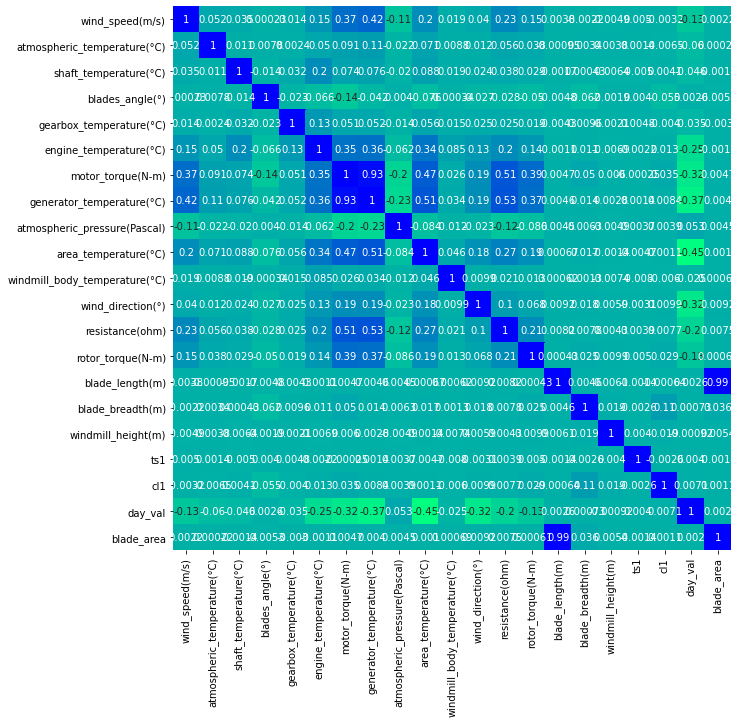

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(comb.corr(),annot=True,cbar=False,cmap='winter_r');

In [94]:
X_train=comb.iloc[:len(train),:]
X_test=comb.iloc[len(train):,]
### already have y_train

In [55]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [56]:
rfc=RandomForestRegressor(random_state=42)
xgb=XGBRegressor(random_state=42)
lgbm=LGBMRegressor(random_state=42)

In [57]:
from sklearn.metrics import r2_score

In [58]:
def cust_scor(estimator,X,y):
    y_pred=estimator.predict(X)
    return r2_score(y,y_pred)

In [59]:
reg=[rfc,xgb,lgbm]

In [95]:
for i in reg:
    print(i)
    print(cross_val_score(i,X_train,y_train,n_jobs=-1,cv=5))
    print(cross_val_score(i,X_train,y_train,n_jobs=-1,cv=5).mean())

RandomForestRegressor(random_state=42)
[0.95620151 0.95881408 0.96395901 0.95617521 0.96337738]


/Users/ysdanu/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.9597054391215135
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
[0.9586169  0.96080549 0.96475395 0.95681595 0.96529431]
0.9612573202400222
LGBMRegressor(random_state=42)
[0.96021346 0.96084385 0.96451401 0.95797408 0.96613086]
0.96193525412816


In [122]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
lgbm()

In [105]:
# lgbm_grid={
#     'n_estimators':[100,300,500,700,900,1100],
#     'boosting_type':['gbdt','dart','goss','rf'],
#     'learning_rate':[0.01,0.03,0.1,0.3],
#     'min_child_samples':[15,20,25]
    
# }

In [122]:
lgbm_grid={
    'n_estimators':[1100],
    'boosting_type':['dart'],
    'learning_rate':[0.1,0.15],
    'min_child_samples':[15]
}

In [114]:
from sklearn.model_selection import GridSearchCV

In [119]:
lgbg_g=GridSearchCV(estimator=lgbm,
                    param_grid=lgbm_grid,
                    n_jobs=-1,
                    cv=5,
                    verbose=2)

In [107]:
# lgbg_g.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 40.1min finished


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'learning_rate': [0.01, 0.03, 0.1, 0.3],
                         'min_child_samples': [15, 20, 25],
                         'n_estimators': [100, 300, 500, 700, 900, 1100]},
             verbose=2)

In [123]:
lgbg_g.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.7min finished


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'boosting_type': ['dart'],
                         'learning_rate': [0.03, 0.1],
                         'min_child_samples': [10, 15],
                         'n_estimators': [1000, 1100, 1200]},
             verbose=2)

In [108]:
# lgbg_g.best_params_

{'boosting_type': 'dart',
 'learning_rate': 0.1,
 'min_child_samples': 15,
 'n_estimators': 1100}

In [124]:
lgbg_g.best_params_

{'boosting_type': 'dart',
 'learning_rate': 0.1,
 'min_child_samples': 15,
 'n_estimators': 1100}

In [101]:
# lgbm_best=LGBMRegressor(random_state=42,n_estimators=800)

In [109]:
# lgbm_best=LGBMRegressor(boosting_type='dart',learning_rate=0.1,min_child_samples=15,
#                         random_state=42,n_estimators=1100)

In [110]:
# cross_val_score(lgbm_best,X_train,y_train,cv=5,n_jobs=-1).mean()

0.9671799696565063

In [ ]:
lgbm_best=LGBMRegressor(boosting_type='dart',learning_rate=0.1,min_child_samples=15,
                        random_state=42,n_estimators=1100)

In [ ]:
cross_val_score(lgbm_best,X_train,y_train,cv=5,n_jobs=-1).mean()

In [111]:
def make_csv(est,name):
    est.fit(X_train,y_train)
    y_pred=est.predict(X_test)
    df=pd.DataFrame({'tracking_id':test_id,'datetime':test.datetime,'windmill_generated_power(kW/h)':y_pred})
    df.to_csv(name,index=False)

In [112]:
make_csv(lgbm_best,'lgbm_v2.csv')

In [168]:
test_kkk=pd.read_csv('lgbm_v1.csv')

In [169]:
test_kkk.head()

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.651955
1,WM_18723,2019-03-30 07:43:20,2.145954
2,WM_34552,2019-08-10 11:33:20,3.402192
3,WM_28570,2019-06-26 03:53:20,6.824943
4,WM_36934,2019-08-27 16:43:20,3.728673


In [170]:
test_kkk.shape

(12086, 3)